# Task1 MINIST TRAINING AND TEST ——PART2

### 本任务的目的是通过minist手写数据集的训练实现对现实手写数字的识别。
1. 用两种方式构建CNN网络
2. 熟悉数据处理到模型构建-训练-预测-保存整个过程

* step1 加载必要的库函数

In [2]:
# import numpy as np
# import glob
# from keras.datasets import mnist
# from keras.utils import np_utils
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
# from keras.optimizers import Adam
# import cv2
# from PIL import Image, ImageFilter
# from keras.models import load_model
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import os
# for tf2.0
import numpy as np
import glob
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import cv2
from PIL import Image, ImageFilter
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

* step2定义处理函数

In [4]:
#  convert 3-band array to 1-band array
def imageprepare(filelist):
    newlist=[]
    for file in (filelist):
        # [dirname,filename]=os.path.split(file)
        # portion = os.path.splitext(filename)#分离文件名字和后缀        
        im = Image.open(file).convert('L')
        tv = np.array(im.getdata()) #get pixel values
        newlist.append(tv)
    newlist=np.array(newlist,dtype='float32')
    return 255-newlist #black num change to white num
# plot function
def plot_func(data,n):
    fig=plt.figure(figsize=(25,5))
    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.imshow(Image.fromarray(np.uint8((data[i,:,:]))),cmap='gray')
    plt.show()

* step3 prepare data

5


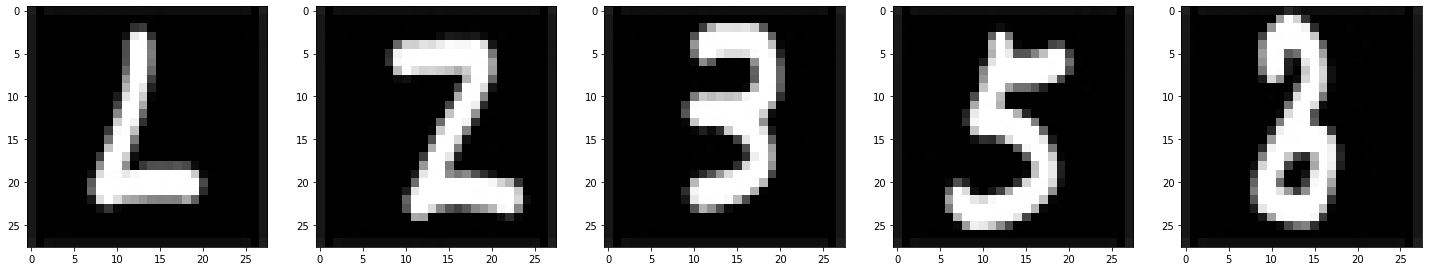

In [5]:
filelist=glob.glob("./data/*.jpg")
print(len(filelist))
data=imageprepare(filelist)
plot_func(data.reshape(5,28,28),data.shape[0])

* step4 load and predict

In [6]:
model=load_model('./mnist.h5')
model.predict_classes(data/255.0)

D:\Anaconda3\envs\tf20\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([6, 2, 3, 5, 2], dtype=int64)